In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

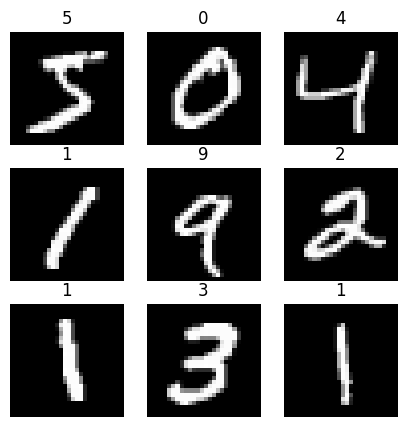

In [4]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, kernel_size=(3,3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.7793 - loss: 0.6636 - val_accuracy: 0.9812 - val_loss: 0.0597
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.9733 - loss: 0.0926 - val_accuracy: 0.9873 - val_loss: 0.0418
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9824 - loss: 0.0604 - val_accuracy: 0.9902 - val_loss: 0.0340
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.9864 - loss: 0.0439 - val_accuracy: 0.9920 - val_loss: 0.0301
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9888 - loss: 0.0384 - val_accuracy: 0.9925 - val_loss: 0.0291
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9912 - loss: 0.0294 - val_accuracy: 0.9932 - val_loss: 0.0259
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9920 - val_loss: 0.0288
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9938 - loss: 0

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9916 - loss: 0.0272
Test Accuracy: 0.9937000274658203


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

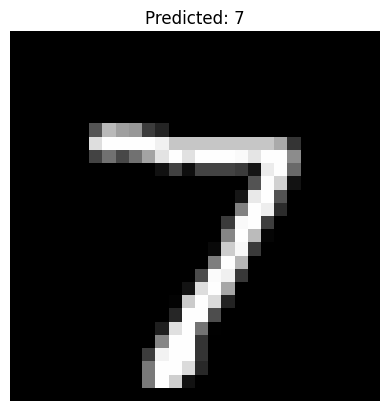

In [9]:
predictions = model.predict(X_test)

plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.axis('off')